# Υπολογιστική εργασία για το μάθημα "Αξιοπιστία Συστημάτων" 9ο εξάμηνο ΤΗΜΜΥ ΑΠΘ

## Ομάδα 2: 
- Σταύρος Βασίλειος Μπουλιόπουλος 9671
- Νικόλαος Γιαννόπουλος 9629

## Θέμα εργασίας: Προσομοίωση σφαλμάτων σε ένα σύστημα με 7 διαφορετικά στοιχεία (1) 

Εισαγωγή βιβλιοθηκών

In [98]:
import numpy as np
import scipy as sp
#import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


Έλεγχος του $\textbf{font-size}$ της γραμματοσειράς του .ipynb αρχείου

In [99]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 16px;
</style>

In [100]:
# synarthsh gia antistrofh syntelesth
def lamda(MTTF):
    return 1/MTTF

# katanomh aksiopistias
def distributionRel(x):
    return np.exp(x)

def serialSubsysRel(R1, R2):
    R = R1 * R2
    return R

def parallelSubsysRel(R1, R2):
    Q1 = 1 - R1
    Q2 = 1 - R2
    Q = Q1 * Q2
    R = 1 - Q
    return R

def totalRgraph(Rel):
    R2_3 = parallelSubsysRel(Rel[1], Rel[2])
    R4_5 = serialSubsysRel(Rel[3], Rel[4])
    R4_5_6 = parallelSubsysRel(R4_5, Rel[5])

    R_total = serialSubsysRel(serialSubsysRel(serialSubsysRel(Rel[0],R2_3), R4_5_6), Rel[6])
    return R_total

def experimentSimulationData(N):
    randPickerIdx = np.ndarray((N,1))
    randPickerIdx = np.random.rand(N,1)
    randPickerIdx = np.floor(N*randPickerIdx)
    randPickerIdx = (np.unique(randPickerIdx)).astype(int)
    return randPickerIdx

def computeRelDistributions(Ci, i, T_c):
    lamda_i = lamda(Ci[0])
    points = 1000
    t = np.linspace(0, T_c, points)
    rel = - lamda_i*t
    rel = distributionRel(rel)
    # duty cycle
    d = Ci[1]
    rel = np.power(rel,d)
    return rel, lamda_i

$\textbf{Συνέχεια 1.1:}$ Εισαγωγή δεδομένων εκφώνησης και επεξεργασία αυτών για προσαρμογή στα ζητούμενα

In [101]:
# ask 1 erwthma 1 , Setup&Dataset
# array : Ci , MTTF, Duty Cycle, MTTR
C1 = np.array([30, 0.3, 12])
C2 = np.array([27, 1, 12])
C3 = np.array([27, 1, 12])
C4 = np.array([24, 1, 10])
C5 = np.array([25, 1, 10])
C6 = np.array([15, 1, 8])
C7 = np.array([31, 0.4, 12])
# print(C1)
# data_C = np.ndarray(7, 3)
# print(data_C)
T_c = 100 #xronos meleths components
T_s = 30 #xronos meleths systhmatos
N = 1000 #epanalhpseis
C = np.vstack((C1,C2,C3,C4,C5,C6,C7))
Rel = np.zeros((C.shape[0], N))
lamdas = np.zeros((C.shape[0],))

for i in range(C.shape[0]):
    Rel[i, :], lamdas[i] = computeRelDistributions(C[i], i, T_c) 

one = mpatches.Patch(facecolor='#0343DF', label='Theoritical', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#0343DF', label = 'Experimental', linewidth = 0.5, edgecolor = 'black')

# PEIRAMATA
randPickerIdx = experimentSimulationData(N)

$\textbf{1.2:}$ Yπολογισμό και προβολή πειραματικών τιμών $\lambda, R $ για χρόνο $T_c = 100$ ώρες για κάθε εξάρτημα

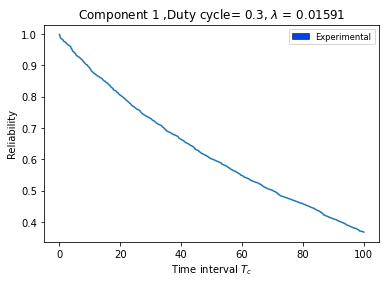

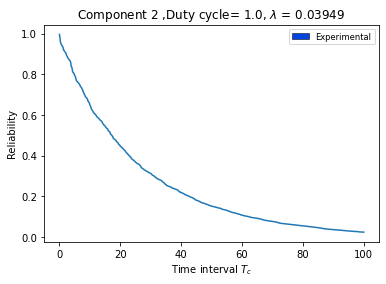

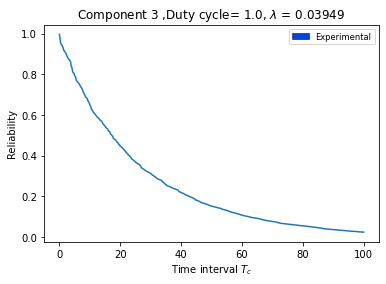

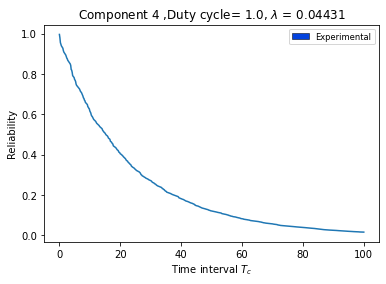

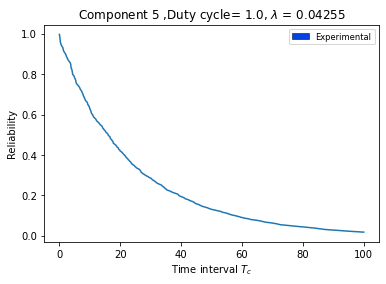

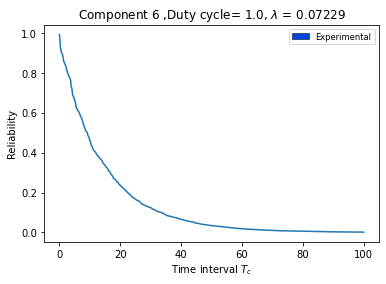

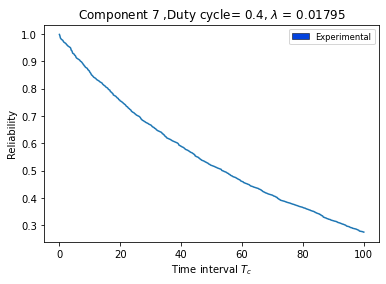

In [102]:
# ask 1 erwthma 2
expirementalRel = np.ndarray((C.shape[0], randPickerIdx.shape[0]))
expLamda = np.ndarray((C.shape[0], 1))
tc_exp = np.linspace(0, T_c, randPickerIdx.shape[0])

integral_space_i = np.linspace(0, T_c, randPickerIdx.shape[0])

for i in range(C.shape[0]):
    for j in range(randPickerIdx.shape[0]):
        expirementalRel[i,j] = Rel[i, randPickerIdx[j]]
        
    MTTF_i = np.trapz(expirementalRel[i,:], integral_space_i)
    expLamda[i] = 1 / MTTF_i
    d = C[i][1]
    plt.title("Component %d ,Duty cycle= %1.1f, $\lambda$ = %1.5f" %(i+1, d ,expLamda[i]))
    plt.ylabel("Reliability")
    plt.xlabel("Time interval $T_c$")
    plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
    plt.plot(tc_exp, expirementalRel[i,:])
    plt.show()

$\textbf{1.3:}$ Yπολογισμό και προβολή πειραματικών τιμών $\lambda, R, MTTF$(ολοκλήρωση ως προς πειραματική αξιοπιστία με κανόνα τραπεζίου) για χρόνο $T_s = 30$ ώρες για το συνολικό σύστημα

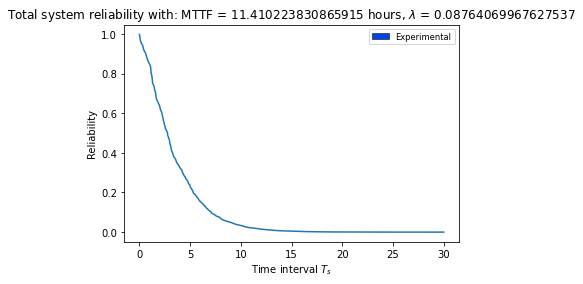

In [103]:
# ask 1 erwthma 3
expR_total = totalRgraph(expirementalRel)
ts = np.linspace(0, T_s, randPickerIdx.shape[0])

# integration of reliability by trapezoidal rule
exp_integral_space = np.linspace(0, T_c, randPickerIdx.shape[0])
exp_MTTF_total = np.trapz(expR_total, exp_integral_space)
exp_lamda_total = 1 / exp_MTTF_total

plt.title('Total system reliability with: MTTF = '+ str(exp_MTTF_total) + ' hours, $\lambda$ = '+ str(exp_lamda_total))
plt.ylabel("Reliability")
plt.xlabel("Time interval $T_s$")
plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
plt.plot(ts, expR_total)
plt.show()

$\textbf{1.4:}$ Σύγκριση θεωρητικών και πειραματικών τιμών βάσει προβολής σε κοινό figure

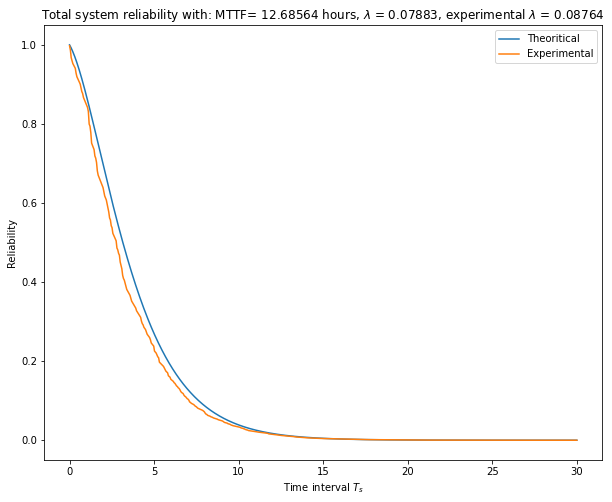

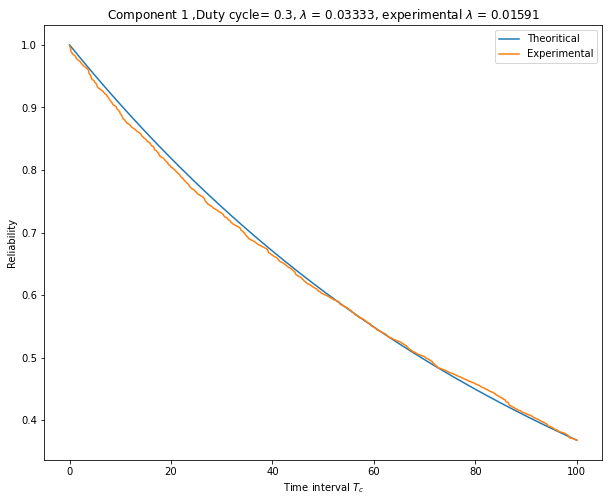

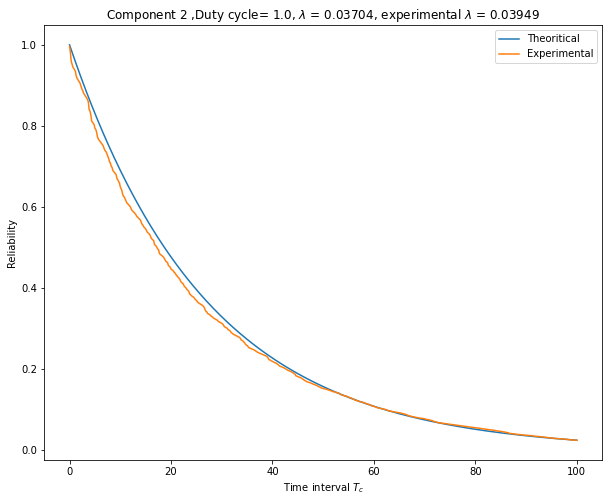

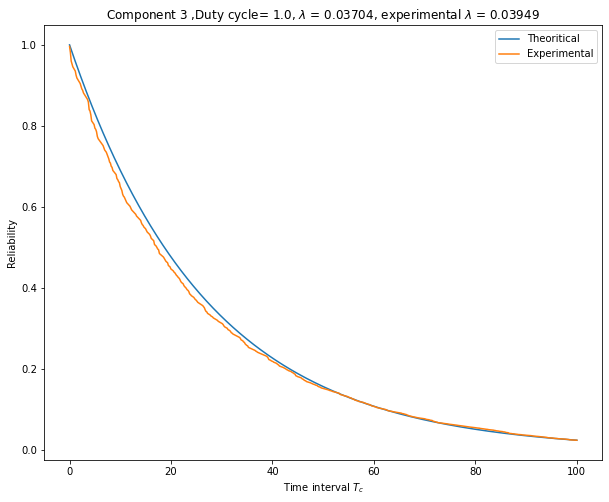

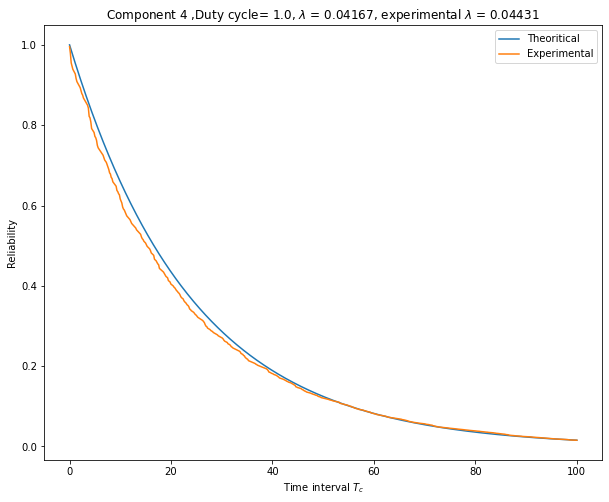

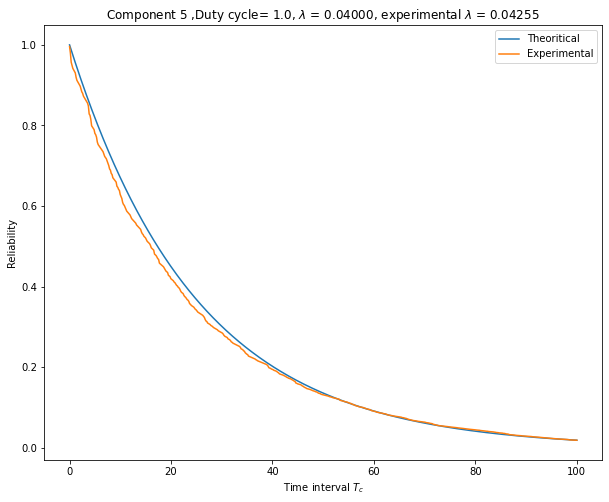

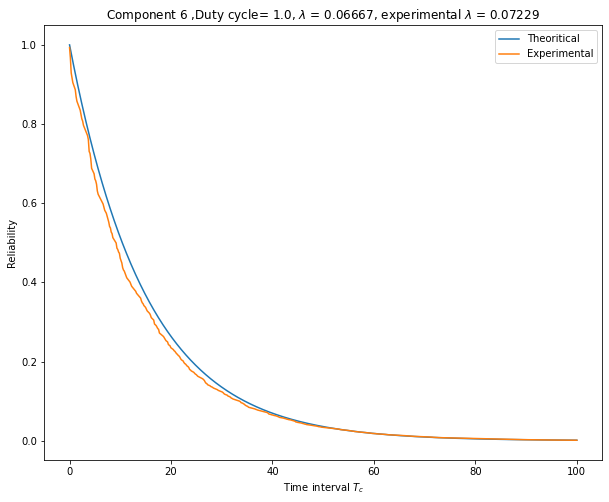

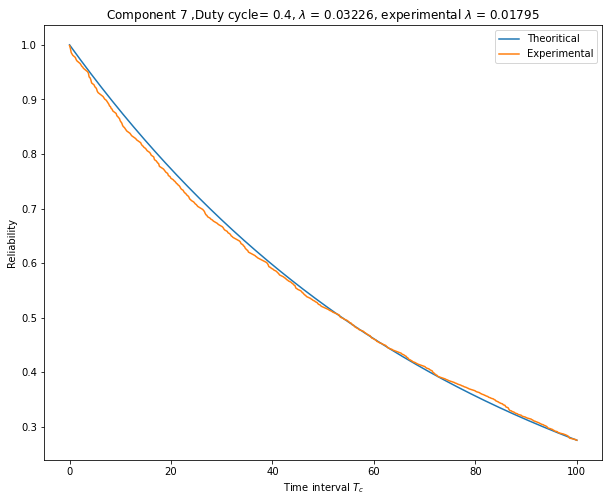

In [104]:
# ask 1 erwthma 4 sygkrish (Theoritical Expiremental)
labels = ["Theoritical", "Experimental"]


# R total projection
R_total = totalRgraph(Rel)
x = np.linspace(0, T_s, N)
# integration of reliability by trapezoidal rule
integral_space = np.linspace(0, T_c, N)
MTTF_total = np.trapz(R_total, integral_space)
#print(MTTF_total)
lamda_total = 1 / MTTF_total


plt.figure(figsize=(10, 8))
# Total system projection   
plt.title("Total system reliability with: MTTF= %1.5f hours, $\lambda$ = %1.5f, experimental $\lambda$ = %1.5f" %(MTTF_total, lamda_total, exp_lamda_total))
plt.plot(x, R_total)

plt.plot(ts, expR_total)

plt.ylabel("Reliability")
plt.xlabel("Time interval $T_s$")
plt.legend(labels)
plt.show()

# Component projection
for i in range(C.shape[0]):
    
    # theoritical
    t = np.linspace(0, T_c, N)
    d = C[i][1]
    
    # exp
    MTTF_i = np.trapz(expirementalRel[i,:], integral_space_i)
    expLamda[i] = 1 / MTTF_i
    
    plt.figure(figsize=(10, 8))
    
    plt.title("Component %d ,Duty cycle= %1.1f, $\lambda$ = %1.5f, experimental $\lambda$ = %1.5f" %(i+1, d ,lamdas[i], expLamda[i]))
    plt.plot(t,Rel[i, :])
    
    plt.plot(tc_exp, expirementalRel[i,:])
    
    plt.ylabel("Reliability")
    plt.xlabel("Time interval $T_c$")
    plt.legend(labels)
    plt.show()







### 2. Προσομοίωση σύνθετου συστήματος με επιδιόρθωση
$\textbf{2.1:}$ Υπολογιστικές συναρτήσεις για την προσομοίωση των βλαβών λαμβάνοντας υπόψη τον χρόνο επισκευής

- $\textbf{lamda(MTTF)}$: Ρυθμός βλαβών $\lambda = 1/MTTF$
- $\textbf{distributionRel(x)}$: Η αξιοπιστία μιας τυχαίας διαδικασίας Poisson υπολογίζεται ως $R(t) = e^{-\lambda t}$  

- $\textbf{serialSubsysAvail(A1, A2)}$: Η συνδυαστική διαθεσιμότητα δύο υποσυστημάτων σε σειρά $A_{sys}(t) = A_1(t) * A_2(t)$

- $\textbf{parallelSubsysAvail}$: Η συνδυαστική διαθεσιμότητα δύο υποσυστημάτων σε παραλληλία χρησιμοποιώντας ως κόλπο την αδιαθεσιμότητα $NA_i(t) = 1 - A_i(t), A(t) = 1 - \prod_{i=1}^{N = 2}(1 - A_i(t))$
- $\textbf{totalAvailGraph(Avail)}$: Υπολογίζει την συνολική διαθεσιμότητα του συστήματος βάσει τον σχεσιακό γράφο της εκφώνησης και του πίνακα διαθεσιμοτήτων κάθε εξαρτήματος-υποσυστήματος

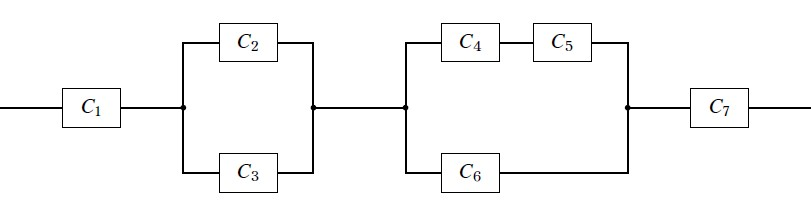

- $\textbf{computeAvailabilityWithRecovery(Ci, i, T_c)}$: Υπολογίζει τους συντελεστές $MTBF, MUT, MTTR, A_s$ και την διαθεσιμότητα A ενός $\textbf{i}$ εξαρτήματος  για τον ζητούμενο χρόνο εξέτασης λειτουργίας λαμβάνοντας υπόψη τον συντελεστή MTTF, MTTR και Duty Cycle ($A(t) = A(t)^{d}$). Συγκεκριμένα υπολογίζουμε: 
    * Availability $A(t) = 1 - \frac{\lambda_i}{\mu_i + \lambda_i}(1 - e^{-(\mu_i + \lambda_i)t})$ 
    * Availability on steady state $A_s = A(t\to\infty) = \frac{\mu_i}{\mu_i + \lambda_i} \approx A(100)$
    * Mean time between failure $MTBF = MTTF + MTTR$
    * Mean up time $MUT = A_s * (MTBF + MTTR)$

In [105]:
# Source : https://www.bmc.com/blogs/system-reliability-availability-calculations/

def serialSubsysAvail(A1, A2):
    A = A1 * A2
    return A

def parallelSubsysAvail(A1, A2):
    notA1 = 1 - A1
    notA2 = 1 - A2
    notA = notA1 * notA2
    A = 1 - notA
    return A

def totalAvailGraph(Avail):
    Avail2_3 = parallelSubsysAvail(Avail[1], Avail[2])
    Avail4_5 = serialSubsysAvail(Avail[3], Avail[4])
    Avail4_5_6 = parallelSubsysAvail(Avail4_5, Avail[5])

    Avail_total = serialSubsysAvail(serialSubsysAvail(serialSubsysAvail(Avail[0],Avail2_3), Avail4_5_6), Avail[6])
    return Avail_total

def computeAvailabilityWithRecovery(Ci, i, T_c):
    MTTF = Ci[0]
    lamda_i  = lamda(MTTF)
    
    MTTR = Ci[2]
    m_i = lamda(MTTR) #function gia antistrofh syntelesth
    A = np.array([[1-lamda_i, lamda_i],[m_i, 1-m_i]])
    I = np.identity(A.shape[0])
    A_I = A - I
    P_0 = np.array([1, 0])
    t = np.linspace(0, T_c, N)
    P0_t = np.ndarray((N,))
    #    M = I + (1/ (m_i + lamda_i))*(1 - np.exp(-(m_i + lamda_i)*t[j]))
    for j in range(t.shape[0]):
        P0_t[j] = 1 - (lamda_i/ (m_i + lamda_i))*(1 - np.exp(-(m_i + lamda_i)*t[j]))
    
    # duty cycle
    d = Ci[1]
    # availability(t)
    A = P0_t
    A = np.power(A,d)
    # availability steady state(t->infinity)
    #A_s = A[-1]
    A_s = m_i/(m_i+ lamda_i)
    A_s = np.power(A_s,d)
    # mean time between failures
    MTBF = MTTF + MTTR
    # mean up time
    MUT = A_s * (MTBF + MTTR)
        
    return MTBF, MUT, MTTR, A_s, A


Υπολογισμό και προβολή θεωρητικών τιμών των συντελεστών $MTBF, MUT, MTTR $ και της διαθεσιμότητας $A(t)$ για χρόνο $T_c = 100$ ώρες για κάθε εξάρτημα

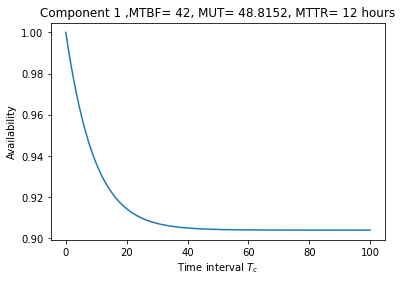

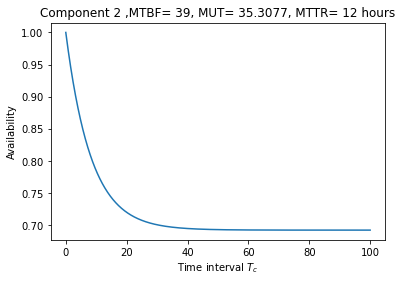

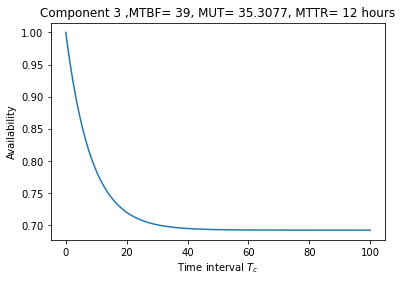

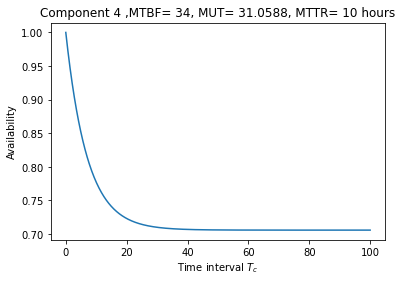

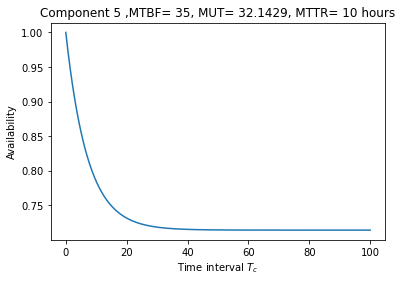

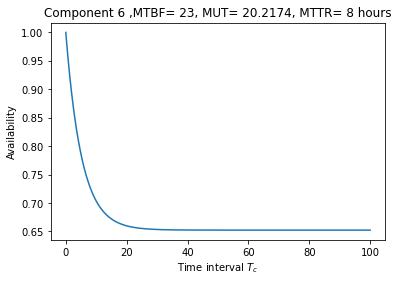

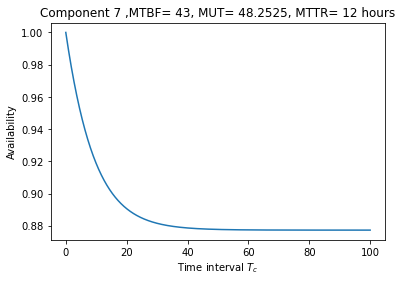

In [106]:

A = np.ndarray((C.shape[0],N))
# mean_times array has per column: MTBF, MUT, MTTR, A_s
mean_times = np.ndarray((C.shape[0],4))

for i in range(0, 7):
    t = np.linspace(0, T_c, N)
    mean_times[i][0], mean_times[i][1], mean_times[i][2], mean_times[i][3], A[i, :] = computeAvailabilityWithRecovery(C[i], i, T_c)
    plt.title("Component %d ,MTBF= %d, MUT= %1.4f, MTTR= %d hours" %(i+1, mean_times[i][0] , mean_times[i][1], mean_times[i][2]))
    plt.ylabel("Availability")
    plt.xlabel("Time interval $T_c$")
    plt.plot(t, A[i,:])
    plt.show()

In [107]:
def serialSubsysLam(lam1, lam2):
    lam = lam1 + lam2
    return lam

def parallelSubsysLam(lam1, lam2):
    lam = lam1*lam2* (lam1 + lam2) / (np.power(lam1, 2) + np.power(lam2, 2) + lam1*lam2)
    return lam

def totalLamdaGraph(lamdas):
    
    lam2_3 = parallelSubsysLam(lamdas[1], lamdas[2])
    lam4_5 = serialSubsysLam(lamdas[3], lamdas[4])
    lam4_5_6 = parallelSubsysLam(lam4_5, lamdas[5])

    lam1_2_3 = serialSubsysLam(lamdas[0], lam2_3)
    lam4_5_6_7 = serialSubsysLam(lam4_5_6, lamdas[6])

    lamdaTotal = serialSubsysLam(lam1_2_3, lam4_5_6_7)
    return lamdaTotal

# oi ry8moi blabhs kai episkeuhs ypakououn stous idious kanones gia seira kai parallhlia
def totalMTTR(MTTR):
    m_arr = lamda(MTTR)
    m_total = totalLamdaGraph(m_arr)
    MTTR_total = lamda(m_total)
    return MTTR_total

def totalMTTF(MTTF):
    return totalMTTR(MTTF)

def plottingAll(A, A_total, N):
    labels = []
    t = np.linspace(0, T_c, N)
    fig = plt.figure(figsize=(10, 8))
    plt.title("Whole view of system ,MTBF= %1.2f, MUT= %1.2f, MTTR= %d hours, $A_s = $%1.4f" %(MTBF_total , MUT_total, MTTR_total, A_s))
    for i in range(0, 7):
        plt.plot(t, A[i,:])
        labels.append(str(i + 1))



    labels.append("Total")
    plt.plot(t, A_total)
    plt.ylabel("Availability")
    plt.xlabel("Time interval $T_c$")
    plt.legend(labels)
    plt.show()    

Υπολογισμό και προβολή θεωρητικών τιμών των συντελεστών $MTBF, MUT, MTTR, A_s$ και της διαθεσιμότητας $A(t)$ για χρόνο $T_c = 100$ ώρες για το συνολικό σύστημα και για κάθε εξάρτημα σε κοινό figure

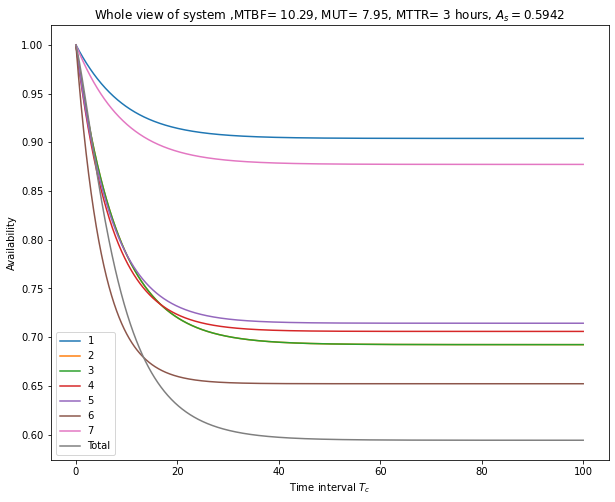

In [108]:
A_total = totalAvailGraph(A)

MTTR_total = totalMTTR(C[:, 2])
MTTF_total = totalMTTF(C[:, 0])
MTBF_total = MTTF_total + MTTR_total
A_s = A_total[-1]

MUT_total = A_s * (MTBF_total + MTTR_total)
# plottarisma gia erwthma 3    
plottingAll(A, A_total, N)

Υπολογισμό και προβολή πειραματικών τιμών των συντελεστών $MTBF, MUT, MTTR, A_s$ και της διαθεσιμότητας $A(t)$ για χρόνο $T_c = 100$ ώρες για το συνολικό σύστημα και για κάθε εξάρτημα σε κοινό figure

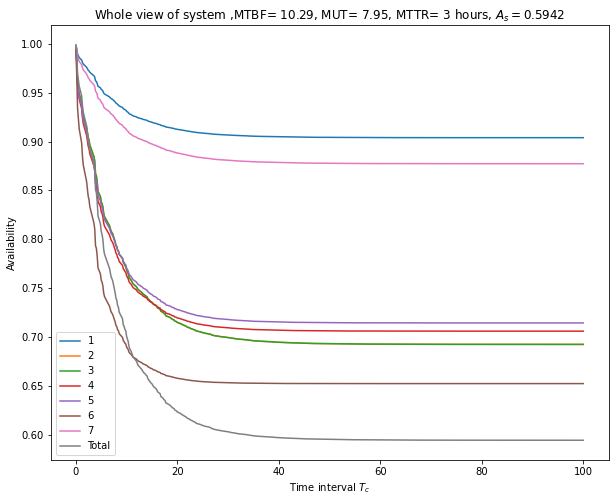

In [109]:
expirementalAvail = np.ndarray((C.shape[0], randPickerIdx.shape[0]))
expLamda = np.ndarray((C.shape[0], 1))
tc_exp = np.linspace(0, T_c, randPickerIdx.shape[0])

for i in range(C.shape[0]):
    for j in range(randPickerIdx.shape[0]):
        expirementalAvail[i,j] = A[i, randPickerIdx[j]]

expirementalAvail_total = totalAvailGraph(expirementalAvail)

plottingAll(expirementalAvail, expirementalAvail_total, randPickerIdx.shape[0])